# Setup

In [1]:
# Import packages
import pandas as pd
from ds_common_utils.aux.io.snowflake_tools import SnowflakeTools
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Setup connection
con = SnowflakeTools(
    role="INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD",
    warehouse="INSIGHT_ANALYST_WH",
    database="BDWPRD_DE",
    schema="IA_MERCH_DE"
)

In [3]:
# Date range
start_date = "'2024-06-18'"
end_date = "'2025-06-18'"

In [4]:
# Updated function with `field` for demographic segment and `level` for groupings like sub-department
def generate_segment_charts(df, field, level):
    sub_charts = {}
    segment_order = df[field].drop_duplicates().tolist()

    for group_val in df[level].drop_duplicates():
        df_sub = df[df[level] == group_val].copy()

        df_sub[field] = pd.Categorical(df_sub[field], categories=segment_order, ordered=True)
        df_sub.sort_values(field, inplace=True)

        def get_color(index):
            if index > 1.2:
                return "green"
            elif index < 0.8:
                return "red"
            else:
                return "grey"

        colors = df_sub["SALES_INDEX"].apply(get_color)

        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.barh(range(len(df_sub)), df_sub["SEGMENT_SALES"] / 1e6, color=colors)

        ax.set_yticks(range(len(df_sub)))
        ax.set_yticklabels(df_sub[field])

        for i, bar in enumerate(bars):
            idx_val = df_sub.iloc[i]["SALES_INDEX"]
            ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f"{idx_val:.2f}",
                    va='center', ha='left', fontsize=10, color=colors.iloc[i])

        ax.set_title(f"Sales by {field}\n{group_val}")
        ax.set_xlabel("Sales ($M)")

        # Only keep left and bottom borders
        for spine_name in ["top", "right"]:
            ax.spines[spine_name].set_visible(False)

        plt.tight_layout()
        sub_charts[group_val] = fig

    return sub_charts

# 300 PEST CONTROL

## Data

In [5]:
# Set item range table name
table_PC = 'PC_item_range' + datetime.today().strftime('%Y_%m_%d')

In [6]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_PC,
                'filter' : "AND item_department_name = '300 PEST CONTROL' "})

snowflake_tools - 2025-06-20 15:20:53.740045+10:00 - Generating new token with 'INSIGHT_ANALYST_MERCH_DE_GENERAL_PRD' role and 'SESSION:ROLE-ANY' scope...
snowflake_tools - 2025-06-20 15:21:03.153547+10:00 - Saved token with '2025-06-20 19:21:03+10:00' expiry...


## Demographic Segments (AU)

In [7]:
PC_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [8]:
# Check data
PC_ds.head(7)

,ITEM_SUB_DEPARTMENT_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,Homeowner older kids,142267.22,6490.0,4711,2003863.09,93283.0,66658,4454030.85,375149.0,...,1637109,0.070996,0.069573,0.070674,0.079992,0.077637,0.075973,0.887540,0.896133,0.930252
1,400 ANIMAL CONTROL,Homeowner younger kids,286179.76,12781.0,9280,2003863.09,93283.0,66658,9915695.67,810303.0,...,1637109,0.142814,0.137013,0.139218,0.178081,0.167692,0.162289,0.801959,0.817050,0.857840
2,400 ANIMAL CONTROL,Older homeowner,1092302.00,51747.0,36312,2003863.09,93283.0,66658,24695832.93,2190509.0,...,1637109,0.545098,0.554731,0.544751,0.443526,0.453327,0.435847,1.229010,1.223690,1.249867
3,400 ANIMAL CONTROL,Renter no kids,118663.40,5535.0,4257,2003863.09,93283.0,66658,4832988.20,444158.0,...,1637109,0.059217,0.059336,0.063863,0.086798,0.091919,0.112929,0.682241,0.645523,0.565515
4,400 ANIMAL CONTROL,Renter with kids,107385.39,4928.0,3734,2003863.09,93283.0,66658,4414681.00,397124.0,...,1637109,0.053589,0.052828,0.056017,0.079286,0.082185,0.091459,0.675900,0.642800,0.612482
5,400 ANIMAL CONTROL,Unclassifiable,18236.59,823.0,578,2003863.09,93283.0,66658,407141.30,36614.0,...,1637109,0.009101,0.008823,0.008671,0.007312,0.007577,0.007732,1.244615,1.164351,1.121443
6,400 ANIMAL CONTROL,Younger homeowner,238828.73,10979.0,7786,2003863.09,93283.0,66658,6960308.42,578220.0,...,1637109,0.119184,0.117696,0.116805,0.125004,0.119663,0.113771,0.953443,0.983560,1.026668


/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

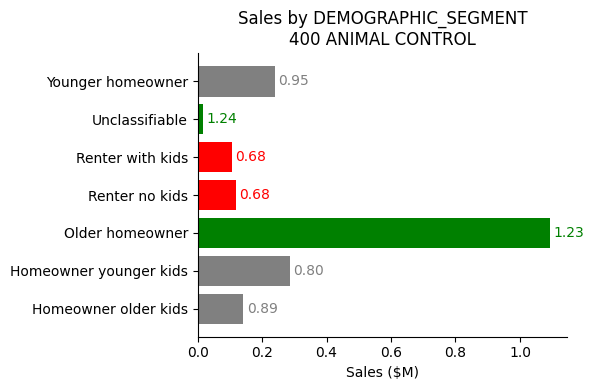

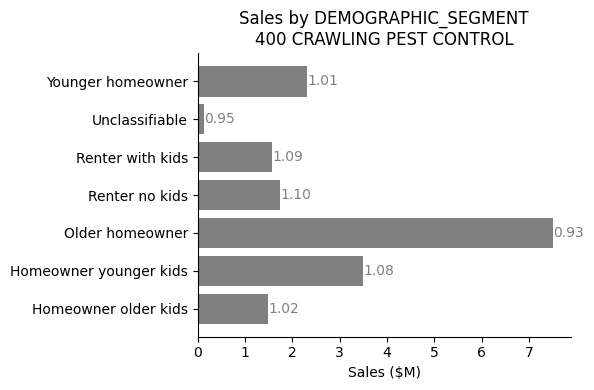

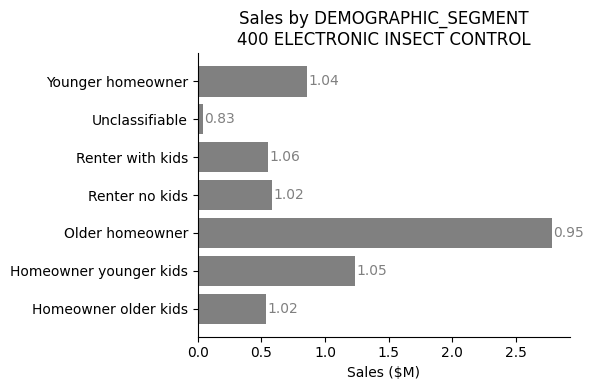

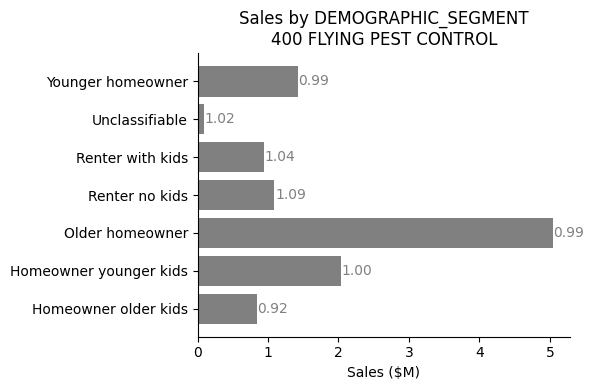

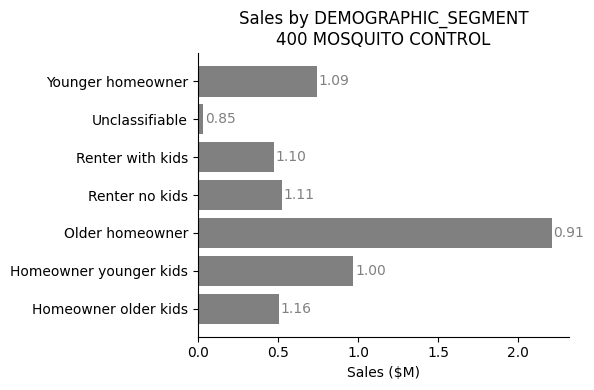

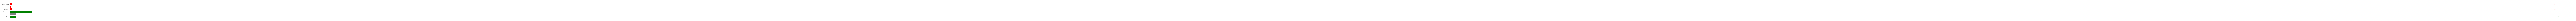

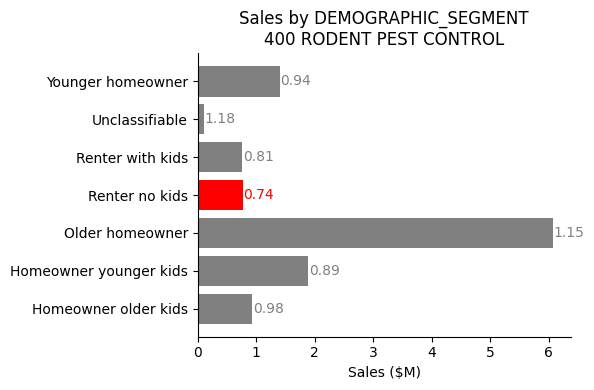

In [9]:
generate_segment_charts(df=PC_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## DIY (AU)

In [10]:
# Get data
PC_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [11]:
# Check data
PC_diy.head()

,ITEM_SUB_DEPARTMENT_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,DIY Maintainer,480774.06,22917.0,16321,1768268.76,82641.0,58926,12532062.18,1106992.0,...,1375961,0.271890,0.277308,0.276975,0.260157,0.265380,0.267331,1.045099,1.044948,1.036075
1,400 ANIMAL CONTROL,DIY Master,405377.57,17266.0,12325,1768268.76,82641.0,58926,12149191.36,999248.0,...,1375961,0.229251,0.208928,0.209161,0.252209,0.239550,0.227660,0.908974,0.872167,0.918743
2,400 ANIMAL CONTROL,DIY Rookie,385434.73,19681.0,14147,1768268.76,82641.0,58926,9743544.08,890774.0,...,1375961,0.217973,0.238151,0.240081,0.202269,0.213546,0.229739,1.077638,1.115221,1.045016
3,400 ANIMAL CONTROL,DIY Skilled,496682.40,22777.0,16133,1768268.76,82641.0,58926,13746373.22,1174338.0,...,1375961,0.280886,0.275614,0.273784,0.285365,0.281525,0.275270,0.984305,0.979004,0.994602
4,400 CRAWLING PEST CONTROL,DIY Maintainer,4057582.22,328344.0,170755,15585425.40,1238771.0,636397,12532062.18,1106992.0,...,1375961,0.260345,0.265056,0.268315,0.260157,0.265380,0.267331,1.000722,0.998781,1.003681


/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

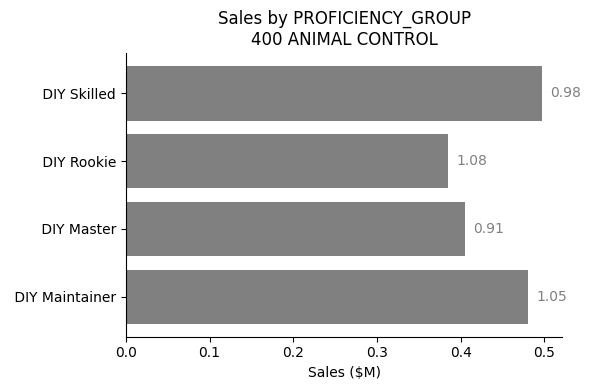

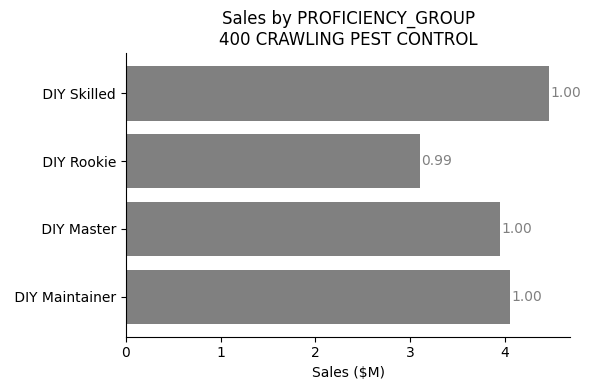

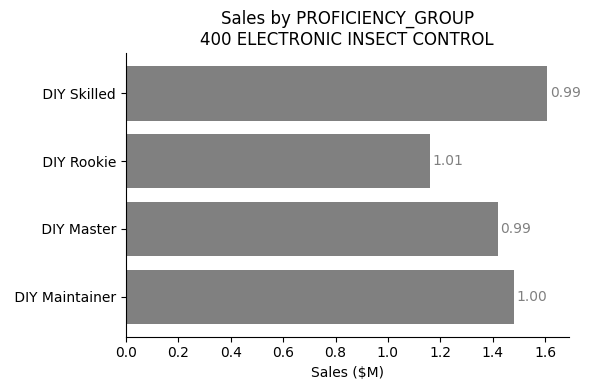

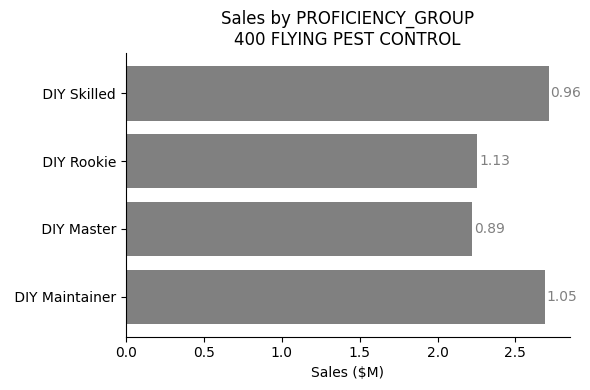

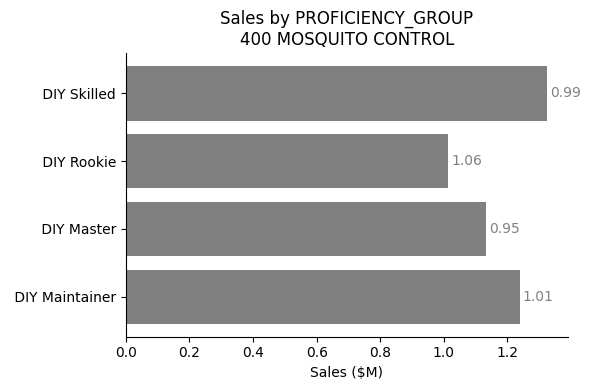

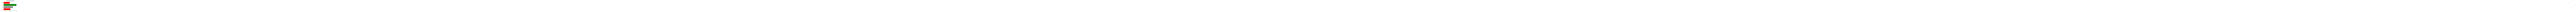

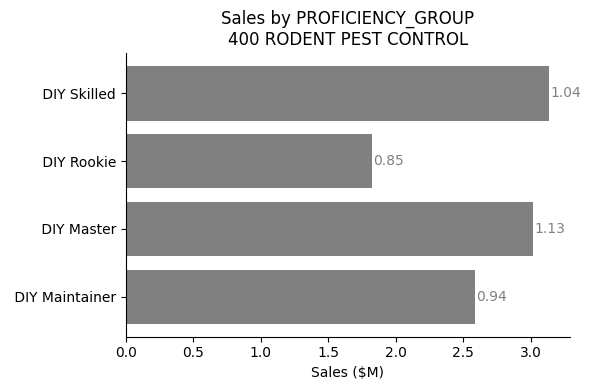

In [12]:
generate_segment_charts(df=PC_diy, field="PROFICIENCY_GROUP", level="ITEM_SUB_DEPARTMENT_NAME")

## RFM (Annual Segment) (AU)

In [13]:
# Get data
PC_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'AU' 
    }
)

In [14]:
# Check data
PC_rfm.head()

,ITEM_SUB_DEPARTMENT_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,High Spend High Frequency,1045679.25,46715.0,31508,1932103.20,90117.0,64248,26247395.94,2185628.0,...,1520718,0.541213,0.518382,0.490412,0.497800,0.478086,0.399117,1.087211,1.084285,1.228742
1,400 ANIMAL CONTROL,High Spend Low Frequency,345782.74,14898.0,10896,1932103.20,90117.0,64248,10045806.53,832041.0,...,1520718,0.178967,0.165318,0.169593,0.190525,0.182001,0.200958,0.939334,0.908336,0.843923
2,400 ANIMAL CONTROL,Low Spend High Frequency,291027.91,15649.0,11685,1932103.20,90117.0,64248,8130547.77,781012.0,...,1520718,0.150628,0.173652,0.181873,0.154201,0.170839,0.181162,0.976824,1.016464,1.003925
3,400 ANIMAL CONTROL,Low Spend Low Frequency,249613.30,12855.0,10159,1932103.20,90117.0,64248,8303092.04,772938.0,...,1520718,0.129193,0.142648,0.158122,0.157474,0.169073,0.218762,0.820407,0.843705,0.722804
4,400 CRAWLING PEST CONTROL,High Spend High Frequency,8116138.38,624712.0,293385,17138430.36,1365686.0,704043,26247395.94,2185628.0,...,1520718,0.473564,0.457435,0.416715,0.497800,0.478086,0.399117,0.951314,0.956804,1.044092


/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 PEST CONTROL OFF RANGE': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

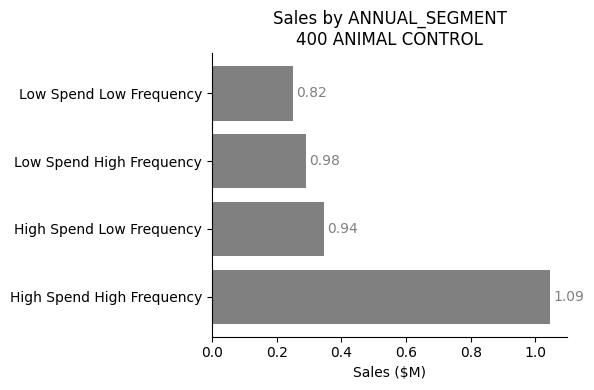

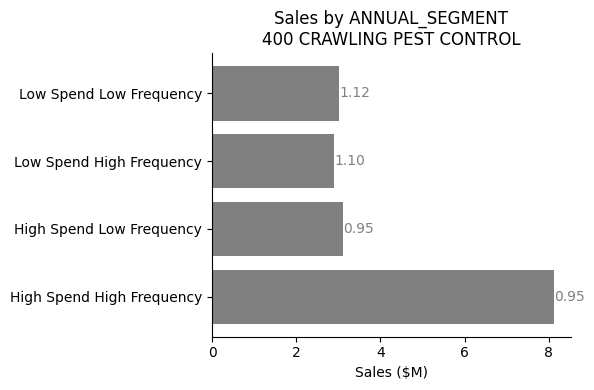

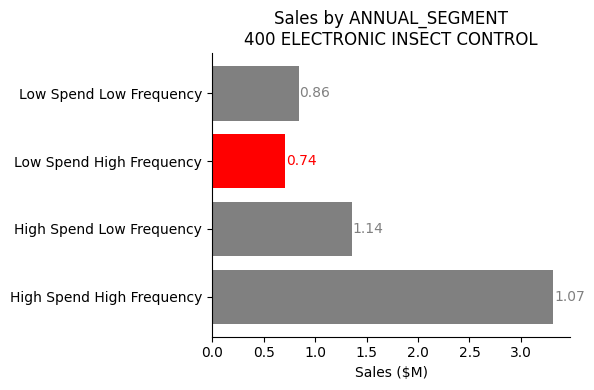

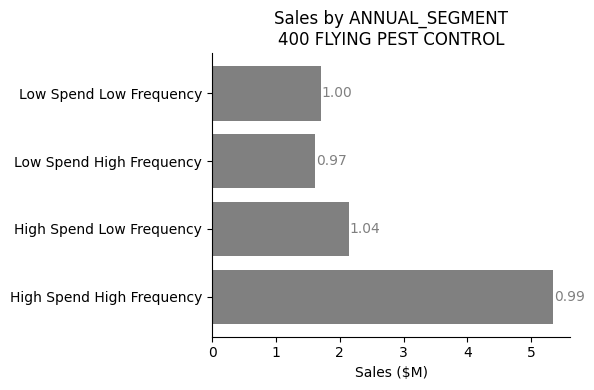

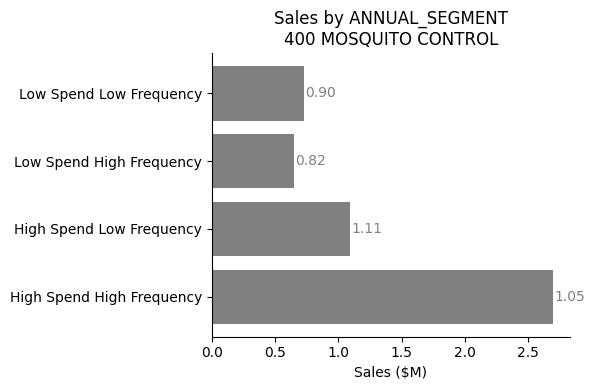

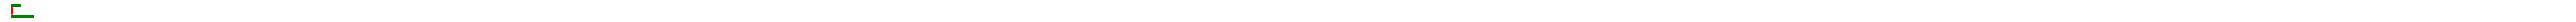

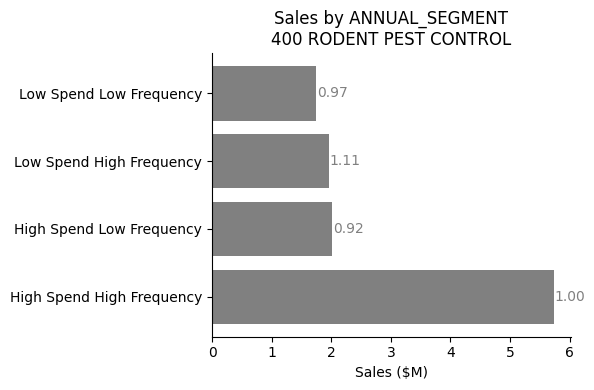

In [15]:
generate_segment_charts(df=PC_rfm, field="ANNUAL_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial BOT (NZ)

In [16]:
# Get data
PC_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'NZ' 
    }
)

In [17]:
# Check data
PC_bot.head()

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,400 ANIMAL CONTROL,B&O,12122.16,432.0,210,17358.57,620.0,378,1772130.84,108563.0,...,30217,0.698339,0.696774,0.555556,0.691967,0.692914,0.556508,1.009208,1.005571,0.998289
1,400 ANIMAL CONTROL,Builder,2549.91,85.0,80,17358.57,620.0,378,377091.35,22518.0,...,30217,0.146896,0.137097,0.211640,0.147244,0.143723,0.201145,0.997642,0.953894,1.052176
2,400 ANIMAL CONTROL,Trades,2686.50,103.0,88,17358.57,620.0,378,411682.25,25584.0,...,30217,0.154765,0.166129,0.232804,0.160750,0.163292,0.242215,0.962767,1.017371,0.961146
3,400 CRAWLING PEST CONTROL,B&O,690080.61,33648.0,8398,991762.03,48288.0,15098,1772130.84,108563.0,...,30217,0.695813,0.696819,0.556233,0.691967,0.692914,0.556508,1.005557,1.005636,0.999506
4,400 CRAWLING PEST CONTROL,Builder,142644.34,6836.0,3099,991762.03,48288.0,15098,377091.35,22518.0,...,30217,0.143829,0.141567,0.205259,0.147244,0.143723,0.201145,0.976811,0.984998,1.020453


/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 HOUSEHOLD PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

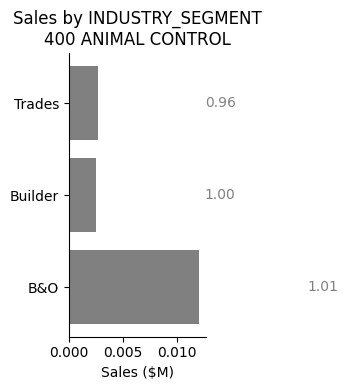

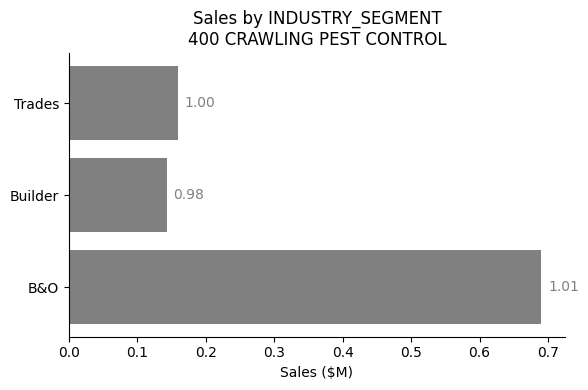

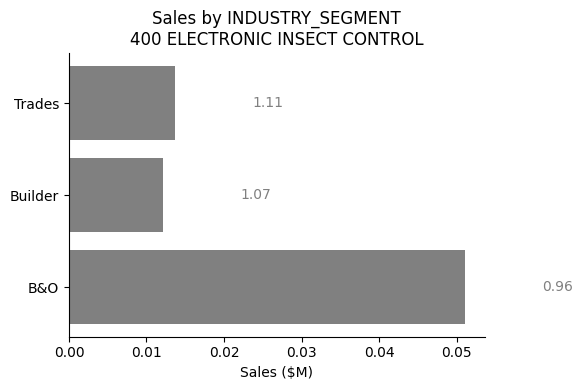

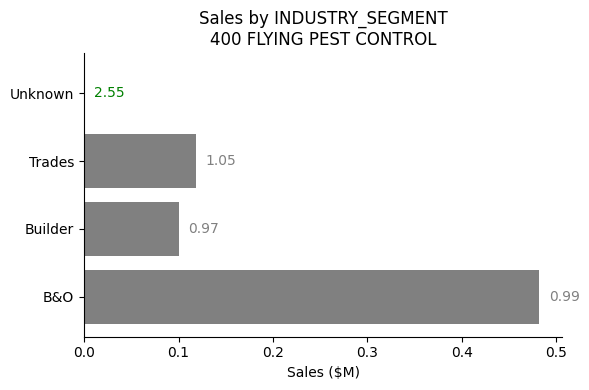

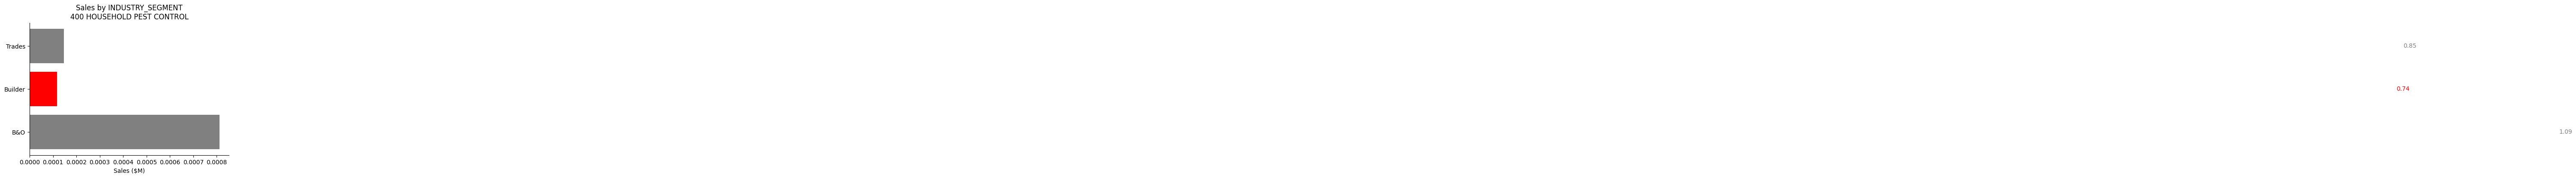

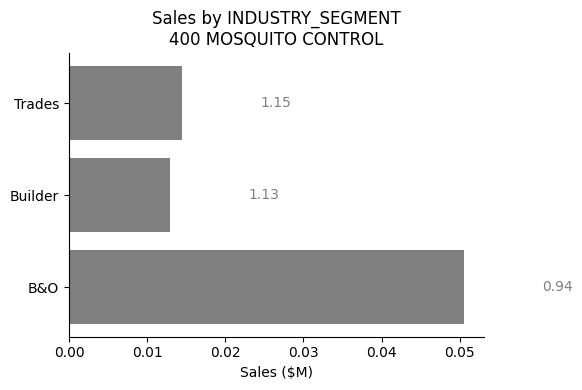

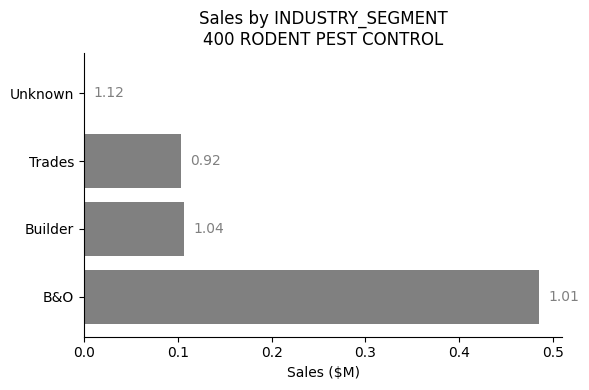

In [18]:
generate_segment_charts(df=PC_bot, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Commercial Industry Segment (NZ)

In [19]:
# Get data
PC_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_PC,
        'level' : 'item_sub_department_name',
        'country' : 'NZ' 
    }
)

In [20]:
# Check data
PC_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_SUB_DEPARTMENT_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
21,400 ELECTRONIC INSECT CONTROL,Carpentry Services,1452.94,50.0,35,41766.46,1730.0,949,23619.46,1380.0,...,17330,0.034787,0.028902,0.036881,0.018119,0.017394,0.024986,1.919919,1.661577,1.476067
45,400 HOUSEHOLD PEST CONTROL,Landscaper and Gardening Services,37.19,10.0,4,578.15,154.0,76,52730.89,3345.0,...,17330,0.064326,0.064935,0.052632,0.040451,0.042162,0.058973,1.590206,1.540135,0.892476
5,400 ANIMAL CONTROL,Landscaper and Gardening Services,508.85,19.0,16,8236.35,302.0,211,52730.89,3345.0,...,17330,0.061781,0.062914,0.075829,0.040451,0.042162,0.058973,1.527295,1.492198,1.285826
53,400 MOSQUITO CONTROL,Commercial Builder,1926.21,232.0,67,39700.16,5192.0,1557,43610.48,2650.0,...,17330,0.048519,0.044684,0.043031,0.033455,0.033402,0.032141,1.450285,1.337775,1.338820
41,400 HOUSEHOLD PEST CONTROL,Carpentry Services,15.16,4.0,3,578.15,154.0,76,23619.46,1380.0,...,17330,0.026222,0.025974,0.039474,0.018119,0.017394,0.024986,1.447177,1.493262,1.579845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,400 ANIMAL CONTROL,Accommodation and Food Services,365.81,14.0,14,8236.35,302.0,211,93324.61,6128.0,...,17330,0.044414,0.046358,0.066351,0.071592,0.077240,0.074726,0.620380,0.600175,0.887924
52,400 MOSQUITO CONTROL,Cleaning Services,904.09,110.0,53,39700.16,5192.0,1557,54332.45,3231.0,...,17330,0.022773,0.021186,0.034040,0.041680,0.040725,0.041777,0.546378,0.520232,0.814802
22,400 ELECTRONIC INSECT CONTROL,Cleaning Services,857.94,47.0,41,41766.46,1730.0,949,54332.45,3231.0,...,17330,0.020541,0.027168,0.043203,0.041680,0.040725,0.041777,0.492837,0.667099,1.034134
1,400 ANIMAL CONTROL,Carpentry Services,73.32,3.0,3,8236.35,302.0,211,23619.46,1380.0,...,17330,0.008902,0.009934,0.014218,0.018119,0.017394,0.024986,0.491304,0.571098,0.569039


/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'400 ANIMAL CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 CRAWLING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 ELECTRONIC INSECT CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 FLYING PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 HOUSEHOLD PEST CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 MOSQUITO CONTROL': <Figure size 600x400 with 1 Axes>,
 '400 RODENT PEST CONTROL': <Figure size 600x400 with 1 Axes>}

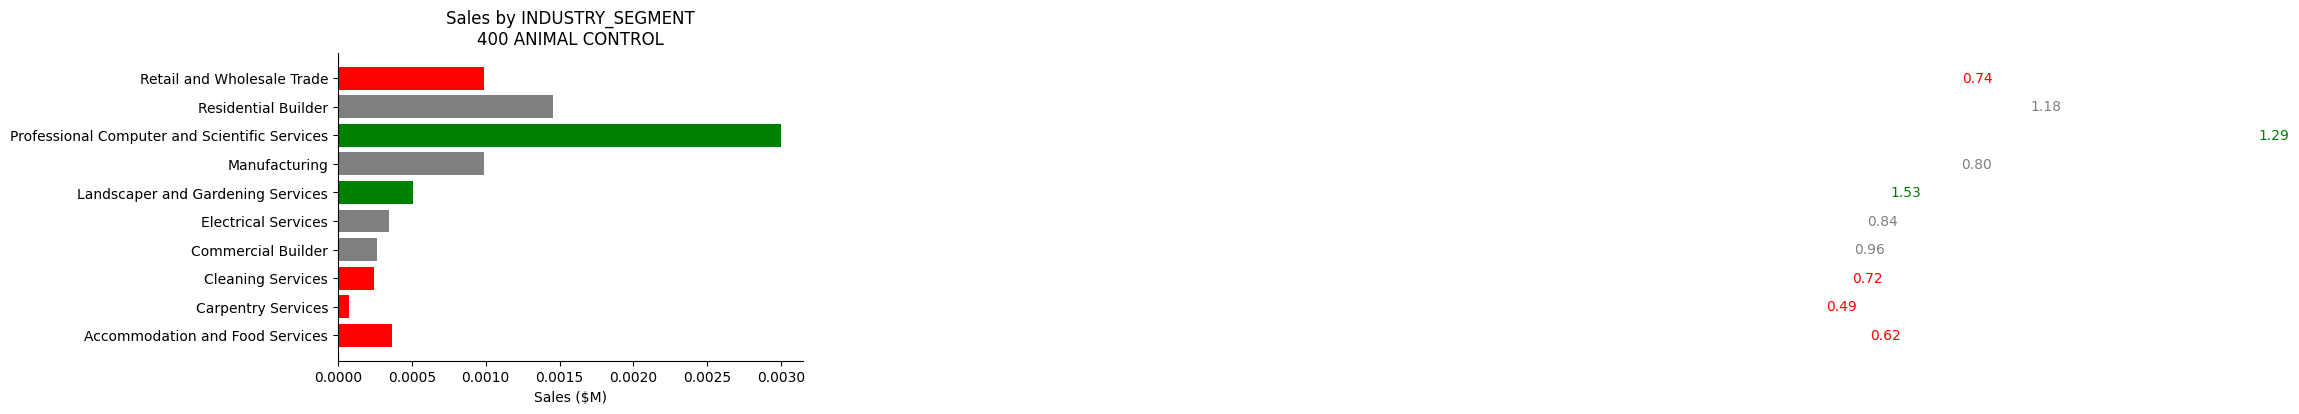

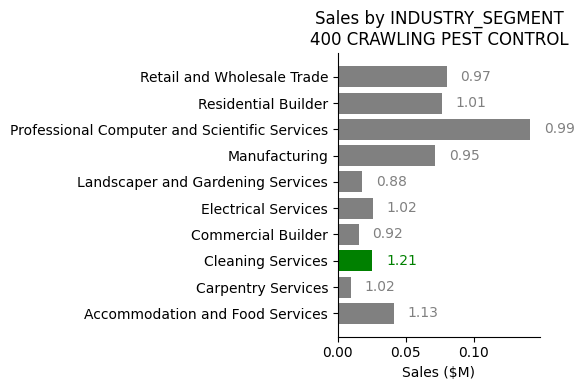

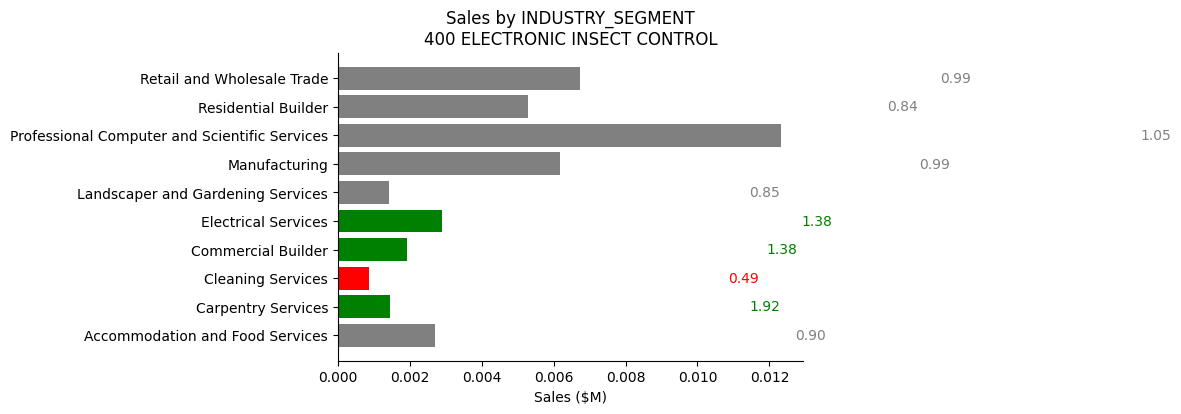

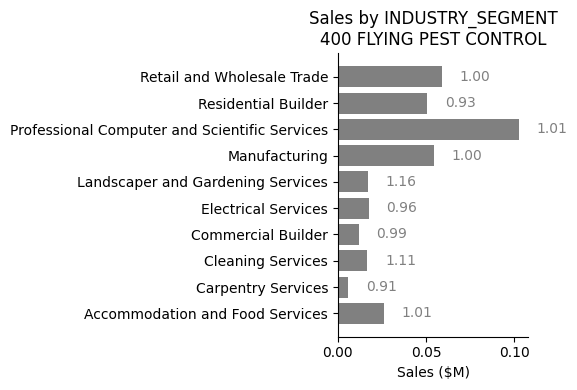

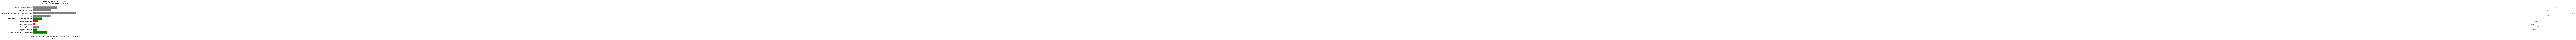

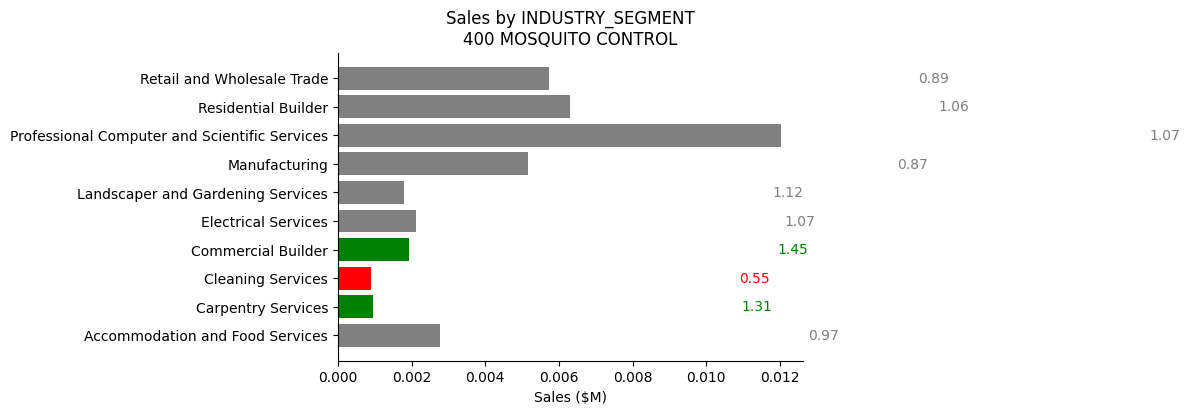

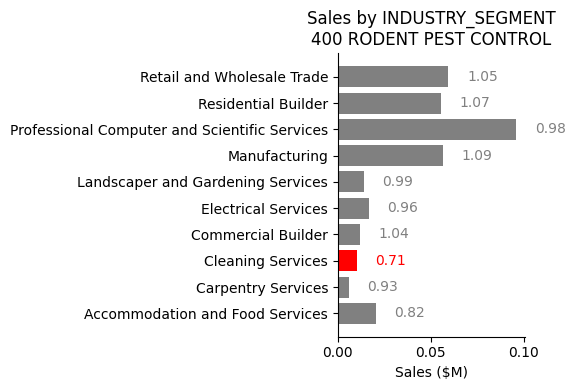

In [21]:
generate_segment_charts(df=PC_is, field="INDUSTRY_SEGMENT", level="ITEM_SUB_DEPARTMENT_NAME")

## Drop item range table

In [22]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_PC}
    )

# 400 GROWING MEDIA

## Data

In [23]:
# Set item range table name
table_GM = 'GM_item_range' + datetime.today().strftime('%Y_%m_%d')

In [24]:
# Create temp item table
con.execute_statement_from_sql_file(
    file='sql/0-item-range.sql',
    formatting={'table_name': table_GM,
                'filter' : "AND item_sub_department_name = '400 GROWING MEDIA' "})

## Demographic Segments (AU)

In [25]:
GM_ds = con.read_sql_file_into_pandas(
    file="sql/1-demographic-segments.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [26]:
# Check data
GM_ds.head()

,ITEM_CLASS_NAME,DEMOGRAPHIC_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,Homeowner older kids,94860.63,5008.0,2543,1156035.77,60571.0,30285,11694301.93,1367538.0,...,2585243,0.082057,0.082680,0.083969,0.072723,0.073778,0.073882,1.128351,1.120652,1.136529
1,500 COIR MULCH BLOCK HYDRO,Homeowner younger kids,181226.80,9553.0,4923,1156035.77,60571.0,30285,22027213.62,2607264.0,...,2585243,0.156766,0.157716,0.162556,0.136980,0.140661,0.141612,1.144446,1.121245,1.147897
2,500 COIR MULCH BLOCK HYDRO,Older homeowner,543632.24,27752.0,13279,1156035.77,60571.0,30285,87828395.20,9992028.0,...,2585243,0.470256,0.458173,0.438468,0.546174,0.539067,0.487653,0.860999,0.849937,0.899139
3,500 COIR MULCH BLOCK HYDRO,Renter no kids,83486.45,4679.0,2816,1156035.77,60571.0,30285,9185339.84,1091963.0,...,2585243,0.072218,0.077248,0.092983,0.057120,0.058911,0.104014,1.264309,1.311266,0.893947
4,500 COIR MULCH BLOCK HYDRO,Renter with kids,45757.49,2592.0,1611,1156035.77,60571.0,30285,5554777.25,684938.0,...,2585243,0.039581,0.042793,0.053195,0.034543,0.036952,0.065931,1.145851,1.158056,0.806828


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

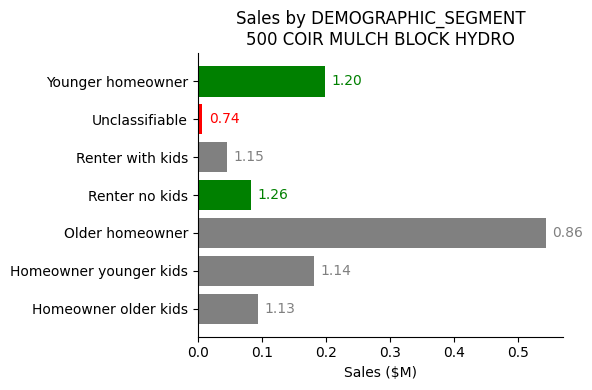

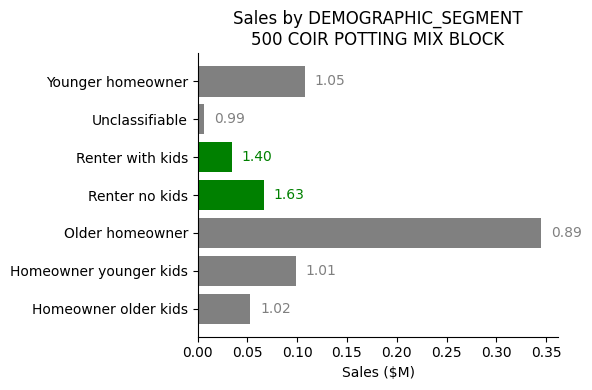

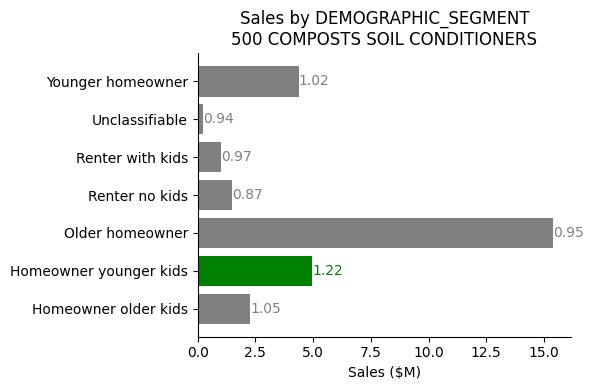

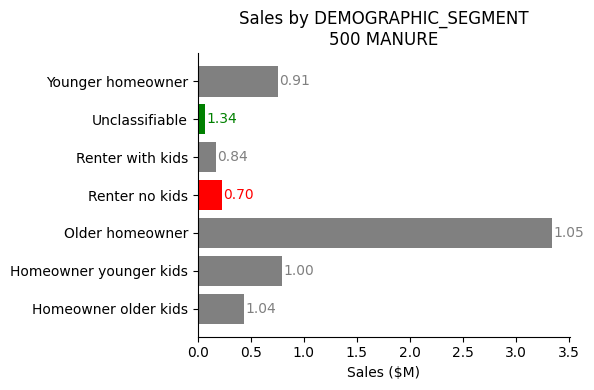

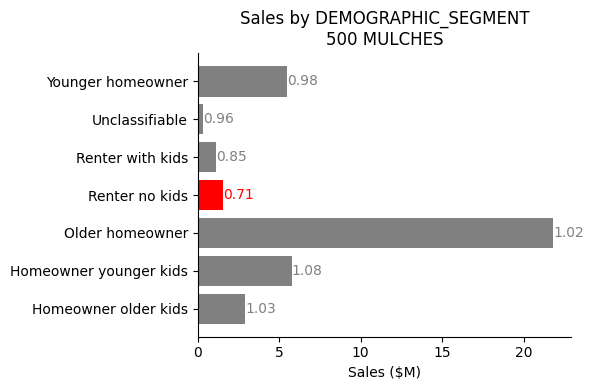

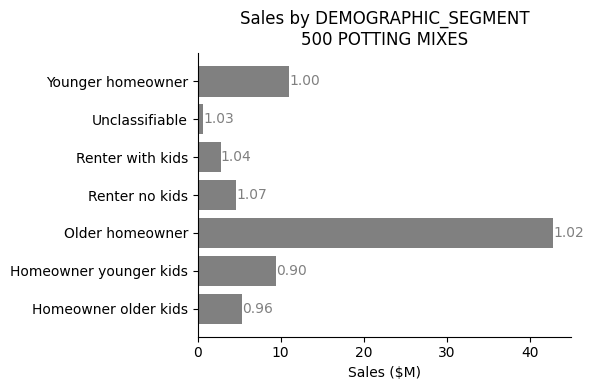

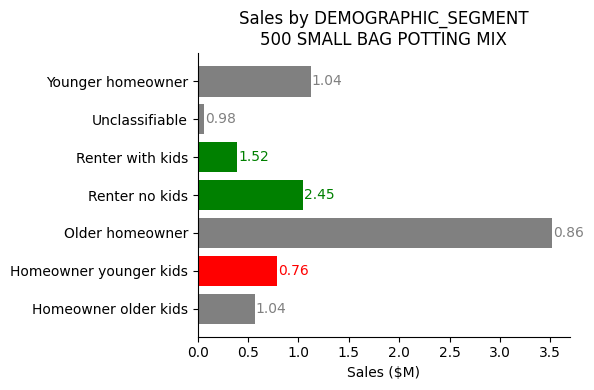

In [27]:
generate_segment_charts(df=GM_ds, field="DEMOGRAPHIC_SEGMENT", level="ITEM_CLASS_NAME")

## DIY (AU)

In [28]:
# Get data
GM_diy = con.read_sql_file_into_pandas(
    file="sql/2-diy-proficiency.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [29]:
# Check data
GM_diy.head()

,ITEM_CLASS_NAME,PROFICIENCY_GROUP,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,DIY Maintainer,269267.64,13925.0,6894,1019264.26,53034.0,26079,39035932.26,4503247.0,...,2157824,0.264178,0.262567,0.264351,0.275244,0.276231,0.272816,0.959799,0.950536,0.968972
1,500 COIR MULCH BLOCK HYDRO,DIY Master,257399.82,13494.0,6207,1019264.26,53034.0,26079,29660408.99,3381436.0,...,2157824,0.252535,0.254441,0.238008,0.209136,0.207419,0.202178,1.207513,1.226700,1.177220
2,500 COIR MULCH BLOCK HYDRO,DIY Rookie,207411.39,10801.0,5907,1019264.26,53034.0,26079,33949818.06,3928522.0,...,2157824,0.203491,0.203662,0.226504,0.239381,0.240977,0.258555,0.850072,0.845150,0.876038
3,500 COIR MULCH BLOCK HYDRO,DIY Skilled,285185.41,14814.0,7071,1019264.26,53034.0,26079,39177096.97,4489264.0,...,2157824,0.279795,0.279330,0.271138,0.276239,0.275373,0.266450,1.012875,1.014370,1.017594
4,500 COIR POTTING MIX BLOCK,DIY Maintainer,169377.56,19989.0,11500,622227.56,74133.0,42696,39035932.26,4503247.0,...,2157824,0.272212,0.269637,0.269346,0.275244,0.276231,0.272816,0.988985,0.976129,0.987281


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

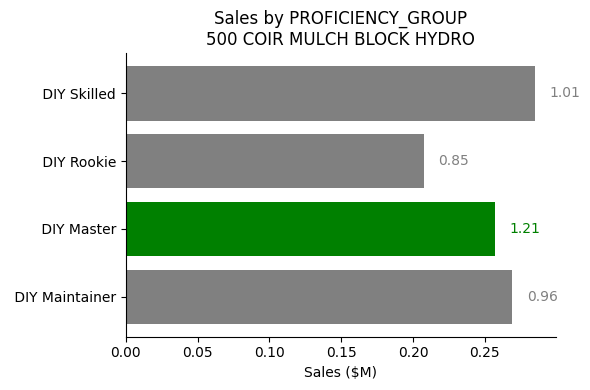

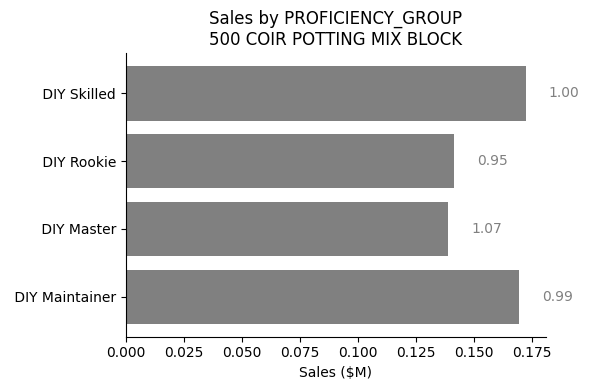

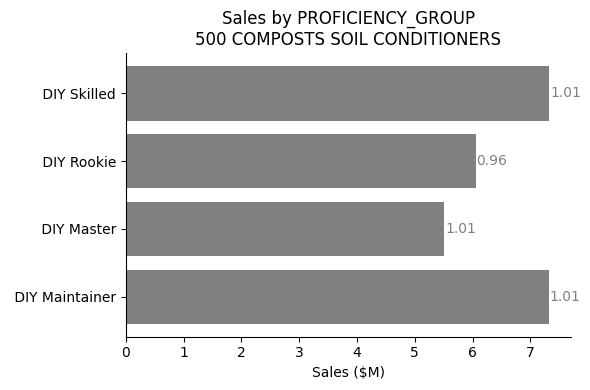

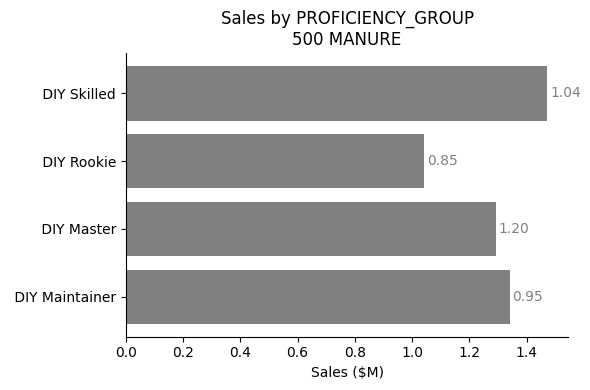

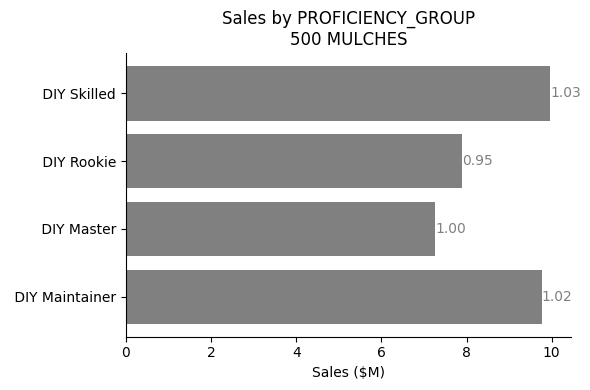

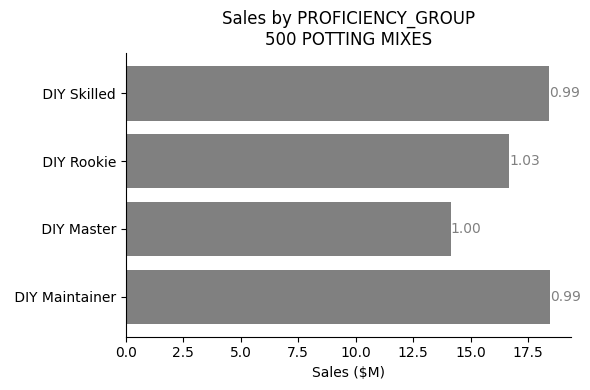

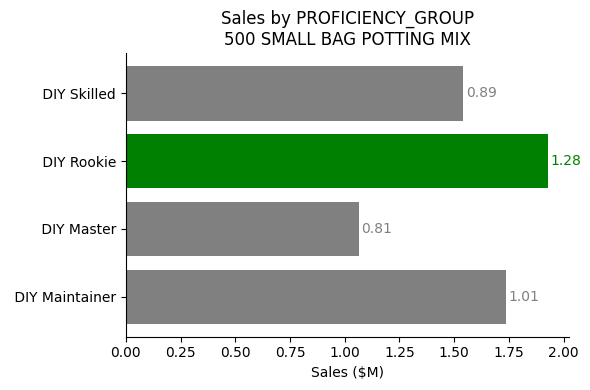

In [30]:
generate_segment_charts(df=GM_diy, field="PROFICIENCY_GROUP", level="ITEM_CLASS_NAME")

## RFM (Annual Segment) (AU)

In [31]:
# Get data
GM_rfm = con.read_sql_file_into_pandas(
    file="sql/3-rfm.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'AU' 
    }
)

In [32]:
# Check data
GM_rfm.head()

,ITEM_CLASS_NAME,ANNUAL_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR MULCH BLOCK HYDRO,High Spend High Frequency,671276.61,34589.0,15094,1122656.84,58673.0,29176,81388412.83,9149292.0,...,2418836,0.597936,0.589522,0.517343,0.522653,0.509986,0.359457,1.144039,1.155958,1.439235
1,500 COIR MULCH BLOCK HYDRO,High Spend Low Frequency,193277.77,10130.0,5510,1122656.84,58673.0,29176,26499867.15,2969464.0,...,2418836,0.172161,0.172652,0.188854,0.170175,0.165519,0.212355,1.011673,1.043092,0.889332
2,500 COIR MULCH BLOCK HYDRO,Low Spend High Frequency,144795.22,7757.0,4461,1122656.84,58673.0,29176,26470812.64,3233272.0,...,2418836,0.128975,0.132207,0.152900,0.169988,0.180224,0.185112,0.758733,0.733572,0.825986
3,500 COIR MULCH BLOCK HYDRO,Low Spend Low Frequency,113307.24,6197.0,4111,1122656.84,58673.0,29176,21362490.68,2588270.0,...,2418836,0.100928,0.105619,0.140903,0.137184,0.144271,0.243076,0.735712,0.732088,0.579666
4,500 COIR POTTING MIX BLOCK,High Spend High Frequency,360312.55,41731.0,22484,686224.80,81704.0,47367,81388412.83,9149292.0,...,2418836,0.525065,0.510758,0.474676,0.522653,0.509986,0.359457,1.004614,1.001515,1.320536


{'500 COIR MULCH BLOCK HYDRO': <Figure size 600x400 with 1 Axes>,
 '500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MANURE': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>,
 '500 SMALL BAG POTTING MIX': <Figure size 600x400 with 1 Axes>}

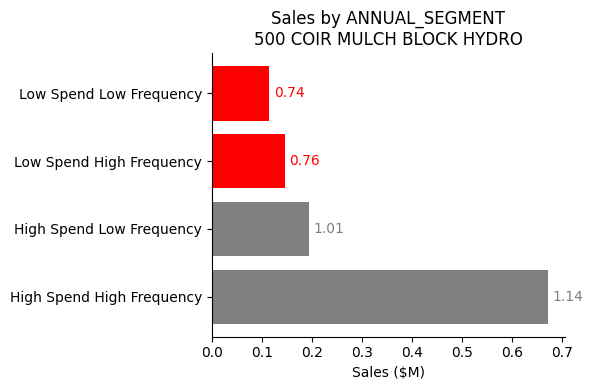

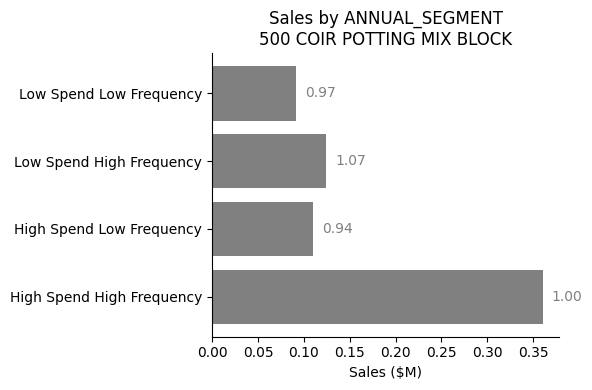

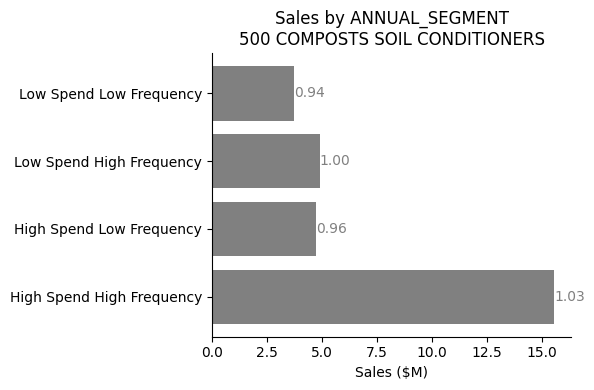

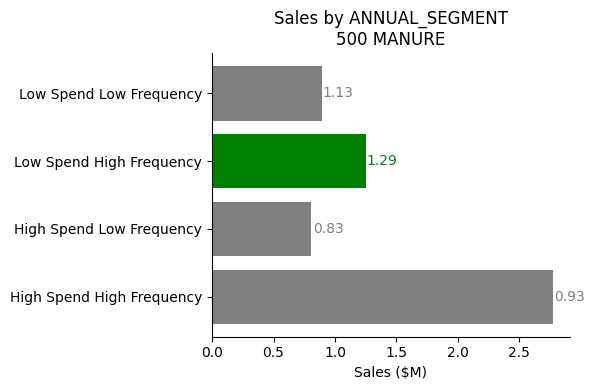

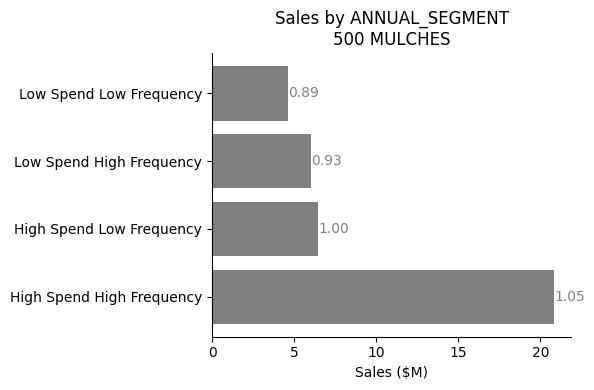

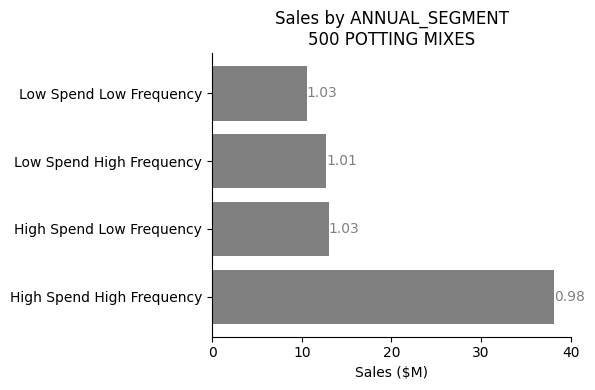

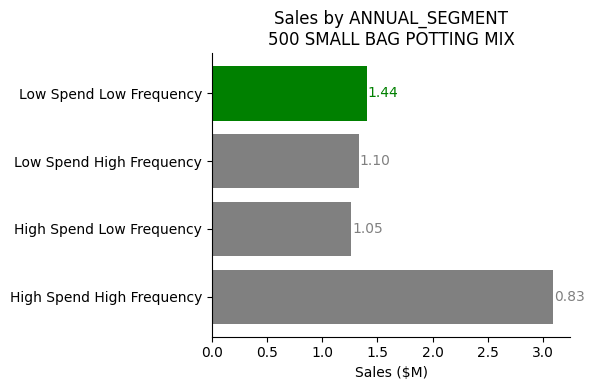

In [33]:
generate_segment_charts(df=GM_rfm, field="ANNUAL_SEGMENT", level="ITEM_CLASS_NAME") 

## Commercial BOT (NZ)

In [34]:
# Get data
GM_bot = con.read_sql_file_into_pandas(
    file="sql/4-commercial-bot.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'NZ' 
    }
)

In [35]:
# Check data
GM_bot.head()

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
0,500 COIR POTTING MIX BLOCK,B&O,13605.02,2078.0,418,20211.20,3307.0,708,2806312.01,328662.0,...,34969,0.673143,0.628364,0.590395,0.689004,0.690983,0.565444,0.976979,0.909377,1.044126
1,500 COIR POTTING MIX BLOCK,Builder,2652.76,552.0,116,20211.20,3307.0,708,593447.61,68687.0,...,34969,0.131252,0.166919,0.163842,0.145703,0.144408,0.194944,0.900819,1.155879,0.840457
2,500 COIR POTTING MIX BLOCK,Trades,3953.42,677.0,174,20211.20,3307.0,708,673058.02,78274.0,...,34969,0.195605,0.204717,0.245763,0.165249,0.164564,0.239441,1.183702,1.243996,1.026403
3,500 COMPOSTS SOIL CONDITIONERS,B&O,854857.32,122441.0,10318,1271075.88,178748.0,18516,2806312.01,328662.0,...,34969,0.672546,0.684992,0.557248,0.689004,0.690983,0.565444,0.976113,0.991330,0.985505
4,500 COMPOSTS SOIL CONDITIONERS,Builder,201570.89,27005.0,3682,1271075.88,178748.0,18516,593447.61,68687.0,...,34969,0.158583,0.151079,0.198855,0.145703,0.144408,0.194944,1.088398,1.046190,1.020062


{'500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIX SMALL BAG': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>}

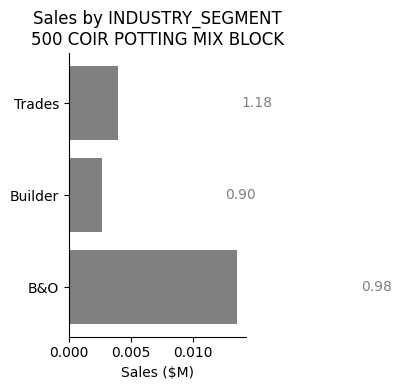

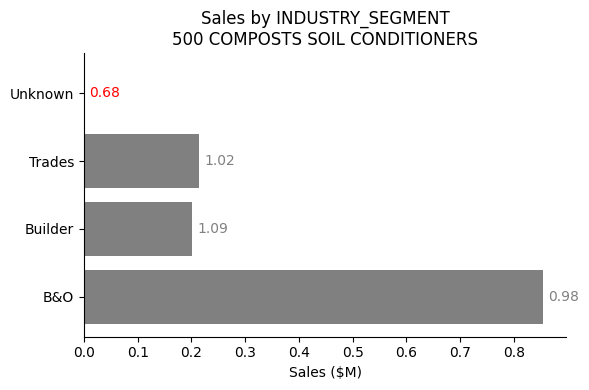

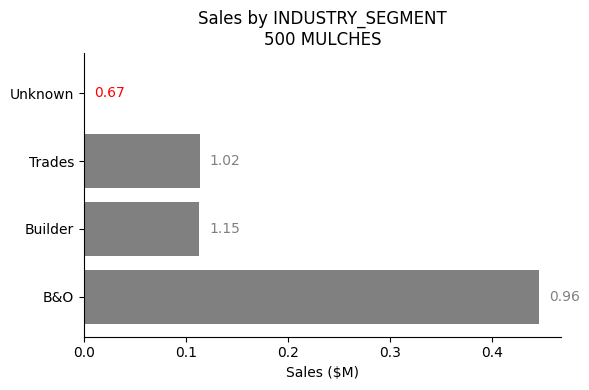

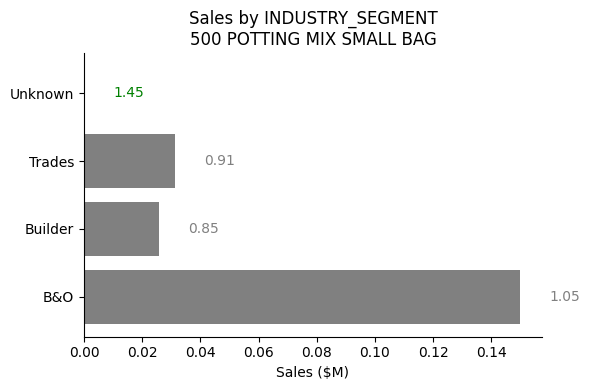

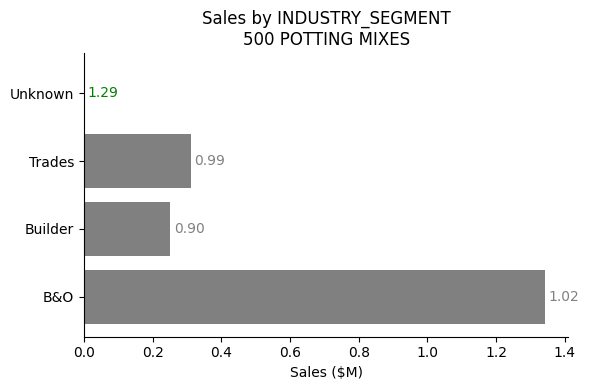

In [36]:
generate_segment_charts(df=GM_bot, field="INDUSTRY_SEGMENT", level="ITEM_CLASS_NAME")

## Commercial Industry Segment (NZ)

In [37]:
# Get data
GM_is = con.read_sql_file_into_pandas(
    file="sql/5-commercial-industry-segment.sql",
    formatting={
        'start_date': start_date,
        'end_date': end_date,
        'n_commercial_segments': 10, 
        'table_name': table_GM,
        'level' : 'item_class_name',
        'country' : 'NZ' 
    }
)

In [38]:
# Check data
GM_is.sort_values(by='SALES_INDEX', ascending=False)

,ITEM_CLASS_NAME,INDUSTRY_SEGMENT,SEGMENT_SALES,SEGMENT_QUANTITY,SEGMENT_CUSTOMERS,TOTAL_SALES,TOTAL_QUANTITY,TOTAL_CUSTOMERS,TOTAL_SEG_SALES,TOTAL_SEG_QUANTITY,...,OVERALL_CUSTOMERS,SEGMENT_SALES_SHARE,SEGMENT_QUANTITY_SHARE,SEGMENT_CUSTOMER_SHARE,OVERALL_SALES_SHARE,OVERALL_QUANTITY_SHARE,OVERALL_CUSTOMER_SHARE,SALES_INDEX,QUANTITY_INDEX,CUSTOMER_INDEX
23,500 MULCHES,Commercial Builder,13771.76,1508.0,152,358561.79,37929.0,4217,59967.66,6913.0,...,20229,0.038408,0.039758,0.036045,0.028295,0.027923,0.028375,1.357422,1.423869,1.270308
2,500 COIR POTTING MIX BLOCK,Cleaning Services,493.49,85.0,21,11821.47,1946.0,410,66222.76,7767.0,...,20229,0.041745,0.043679,0.051220,0.031246,0.031372,0.040734,1.335999,1.392290,1.257426
22,500 MULCHES,Cleaning Services,14843.62,1657.0,168,358561.79,37929.0,4217,66222.76,7767.0,...,20229,0.041398,0.043687,0.039839,0.031246,0.031372,0.040734,1.324876,1.392530,0.978028
0,500 COIR POTTING MIX BLOCK,Accommodation and Food Services,832.15,125.0,41,11821.47,1946.0,410,116710.80,13622.0,...,20229,0.070393,0.064234,0.100000,0.055069,0.055022,0.074003,1.278279,1.167436,1.351297
21,500 MULCHES,Carpentry Services,7198.12,417.0,76,358561.79,37929.0,4217,34104.59,3717.0,...,20229,0.020075,0.010994,0.018022,0.016092,0.015014,0.022295,1.247524,0.732283,0.808343
14,500 COMPOSTS SOIL CONDITIONERS,Electrical Services,30735.54,4181.0,731,664307.68,92790.0,10791,84521.58,9927.0,...,20229,0.046267,0.045059,0.067742,0.039881,0.040097,0.065055,1.160140,1.123745,1.041304
5,500 COIR POTTING MIX BLOCK,Landscaper and Gardening Services,1273.63,214.0,46,11821.47,1946.0,410,197370.74,22765.0,...,20229,0.107739,0.109969,0.112195,0.093127,0.091952,0.073063,1.156899,1.195942,1.535593
8,500 COIR POTTING MIX BLOCK,Residential Builder,1989.57,444.0,63,11821.47,1946.0,410,309825.29,35887.0,...,20229,0.168301,0.228160,0.153659,0.146188,0.144954,0.187454,1.151271,1.574018,0.819716
4,500 COIR POTTING MIX BLOCK,Electrical Services,523.92,96.0,25,11821.47,1946.0,410,84521.58,9927.0,...,20229,0.044319,0.049332,0.060976,0.039881,0.040097,0.065055,1.111303,1.230317,0.937299
37,500 POTTING MIX SMALL BAG,Professional Computer and Scientific Services,35801.68,4103.0,912,105463.91,11851.0,4326,648037.90,75952.0,...,20229,0.339469,0.346216,0.210818,0.305769,0.306784,0.208562,1.110211,1.128533,1.010817


/tmp/ipykernel_87630/3417181577.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


{'500 COIR POTTING MIX BLOCK': <Figure size 600x400 with 1 Axes>,
 '500 COMPOSTS SOIL CONDITIONERS': <Figure size 600x400 with 1 Axes>,
 '500 MULCHES': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIX SMALL BAG': <Figure size 600x400 with 1 Axes>,
 '500 POTTING MIXES': <Figure size 600x400 with 1 Axes>}

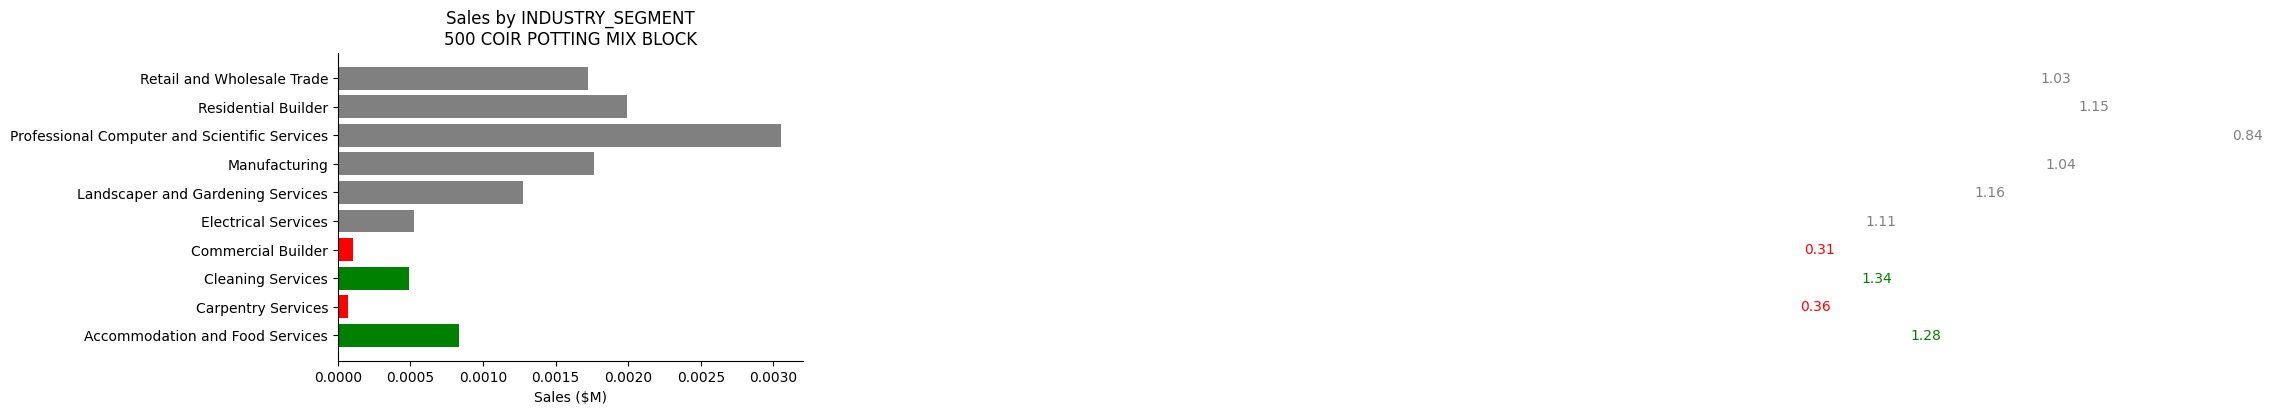

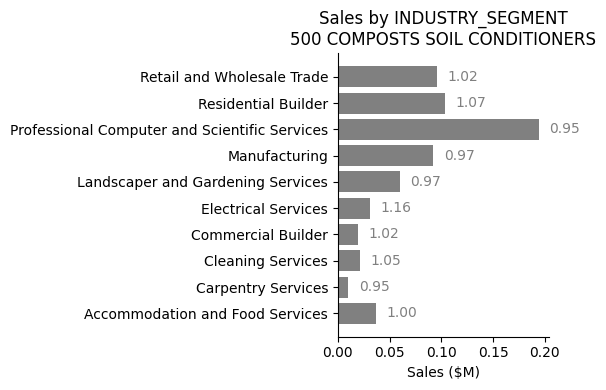

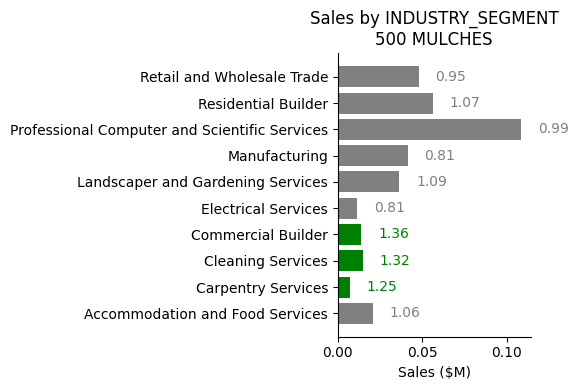

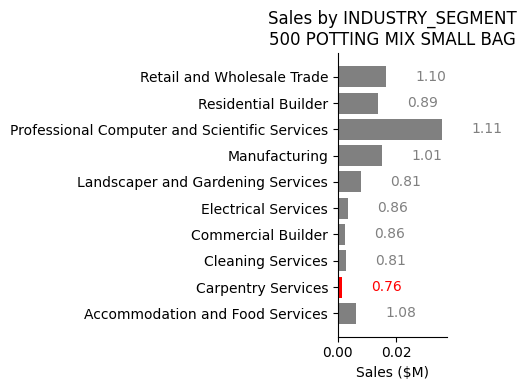

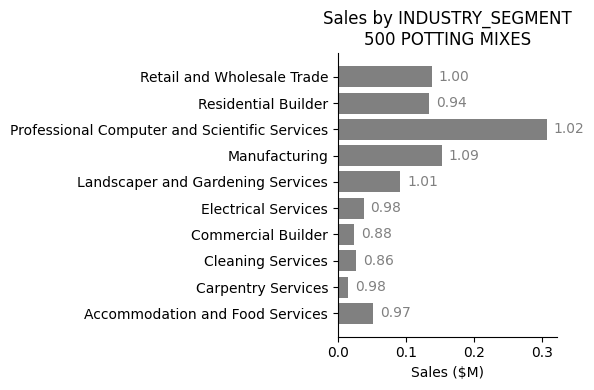

In [39]:
generate_segment_charts(df=GM_is, field="INDUSTRY_SEGMENT", level="ITEM_CLASS_NAME")

## Drop item range table

In [40]:
# Drop item range table
con.execute_statement_from_sql_string(
    statement='DROP TABLE bdwprd_de.ia_merch_de.{table_name};',
    formatting={'table_name': table_GM}
    )